In [2]:
# import pandas as pd

# df = pd.read_csv('test_data.csv')

# thresh = df.shape[0] * 0.5
# droped_df = df.dropna(axis=1, thresh=thresh)

# m = droped.shape[1] - 2
# droped_df = droped_df.dropna(axis=0, thresh=m)

# values = {
#     'one': droped_df['one'].mean(),
#     'two': droped_df['two'].mean(),
#     'four': droped_df['four'].mode()
# }
# droped_df = droped_df.fillna(values)


8. Закрепление знаний

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

In [4]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


In [6]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
Gender                        1
dtype: int64

Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела.

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

Задание 8.1

Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [7]:
mask = diabetes.duplicated()
dupl_diabetes = diabetes[mask]
dupl_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
768,6,98,58,33,190,34.0,0.430,43,0,Female
769,2,112,75,32,0,35.7,0.148,21,0,Female
770,2,108,64,0,0,30.8,0.158,21,0,Female
771,8,107,80,0,0,24.6,0.856,34,0,Female
772,7,136,90,0,0,29.9,0.210,50,0,Female
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female
777,5,147,78,0,0,33.7,0.218,65,0,Female


In [8]:
diabetes_dedupped = diabetes.drop_duplicates()
diabetes_dedupped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Gender                    768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 66.0+ KB


Задание 8.2

Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [9]:
low_information_cols = []
for col in diabetes_dedupped:
    max_value = diabetes_dedupped[col].value_counts(normalize=True).max()
    top_freq = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    if max_value > 0.95 or top_freq > 0.95:
        low_information_cols.append(col)
low_information_cols

['Gender']

In [10]:
diabetes_dedupped['Pregnancies'].value_counts(normalize=True).max()


0.17578125

In [11]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [12]:
display(diabetes_dedupped['BMI'].nunique())
display(diabetes_dedupped['BMI'].count())
display(diabetes_dedupped['BMI'].value_counts(normalize=True))


248

768

32.0    0.016927
31.2    0.015625
31.6    0.015625
0.0     0.014323
33.3    0.013021
          ...   
39.6    0.001302
44.6    0.001302
40.2    0.001302
49.3    0.001302
39.3    0.001302
Name: BMI, Length: 248, dtype: float64

In [13]:
display(diabetes_dedupped['BMI'].nunique())
display(diabetes_dedupped['BMI'].count())
display(diabetes_dedupped['BMI'].value_counts(normalize=True))


248

768

32.0    0.016927
31.2    0.015625
31.6    0.015625
0.0     0.014323
33.3    0.013021
          ...   
39.6    0.001302
44.6    0.001302
40.2    0.001302
49.3    0.001302
39.3    0.001302
Name: BMI, Length: 248, dtype: float64

In [14]:
display(diabetes_dedupped['Glucose'].nunique())
display(diabetes_dedupped['Glucose'].count())
display(diabetes_dedupped['Glucose'].value_counts(normalize=True))


136

768

99     0.022135
100    0.022135
111    0.018229
129    0.018229
106    0.018229
         ...   
61     0.001302
191    0.001302
62     0.001302
172    0.001302
199    0.001302
Name: Glucose, Length: 136, dtype: float64

In [15]:

display(diabetes_dedupped['DiabetesPedigreeFunction'].nunique())
display(diabetes_dedupped['DiabetesPedigreeFunction'].count())
display(diabetes_dedupped['DiabetesPedigreeFunction'].value_counts(normalize=True))


517

768

0.254    0.007812
0.258    0.007812
0.259    0.006510
0.207    0.006510
0.261    0.006510
           ...   
0.352    0.001302
0.554    0.001302
0.821    0.001302
0.588    0.001302
1.136    0.001302
Name: DiabetesPedigreeFunction, Length: 517, dtype: float64

In [16]:
information_diabetes = diabetes_dedupped.drop(low_information_cols, axis=1)
information_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [17]:
information_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


Задание 8.3

Попробуйте найти пропуски в данных с помощью метода isnull().

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [18]:
information_diabetes.isnull().nunique()

Pregnancies                 1
Glucose                     1
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64

In [19]:
for col in information_diabetes.columns:
    for el in information_diabetes[col]:
        if not el:
            print(f'Столбец {col} содержит {el}')
            break


Столбец Pregnancies содержит 0
Столбец Glucose содержит 0
Столбец BloodPressure содержит 0
Столбец SkinThickness содержит 0
Столбец Insulin содержит 0
Столбец BMI содержит 0.0
Столбец Outcome содержит 0


In [20]:
def return_nan(num):
    return np.nan if num == 0 else num

cols_with_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_nan:
    information_diabetes[col] = information_diabetes[col].apply(lambda x: return_nan(x))
information_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [21]:
np.isnan(information_diabetes['Insulin'])

0      False
1       True
2       True
3       True
4       True
       ...  
763    False
764     True
765     True
766     True
767     True
Name: Insulin, Length: 768, dtype: bool

In [22]:
round(information_diabetes['Insulin'].value_counts(dropna=False, normalize=True)[np.nan], 2)
information_diabetes['Insulin'].isnull().mean()

0.4869791666666667

In [23]:
# diabetes=diabetes.replace({'Glucose': {0:np.nan}, 'BloodPressure': {0:np.nan}, 'Insulin':{0:np.nan}, 'BMI': {0:np.nan}})

Задание 8.4

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [24]:
thresh = information_diabetes.shape[0] * 0.7

information_diabetes = information_diabetes.dropna(axis=1, thresh=thresh)

information_diabetes.columns.shape

(8,)

In [25]:
information_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


Задание 8.5

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [26]:
m = information_diabetes.shape[1] - 2
information_diabetes = information_diabetes.dropna(axis=0, thresh=m)
# information_diabetes.to_excel('data/info_diab.xlsx')

In [27]:
# information_diabetes.to_excel('data/info_diab.xlsx')

Задание 8.6

В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [28]:
display(information_diabetes.columns)
values = {
    'Pregnancies': information_diabetes['Pregnancies'].median(), 
    'Glucose': information_diabetes['Glucose'].median(), 
    'BloodPressure': information_diabetes['BloodPressure'].median(), 
    'SkinThickness': information_diabetes['SkinThickness'].median(), 
    'BMI': information_diabetes['BMI'].median(),
    'DiabetesPedigreeFunction': information_diabetes['DiabetesPedigreeFunction'].median(), 
    'Age': information_diabetes['Age'].median(), 
    'Outcome': information_diabetes['Outcome'].median()
}
information_diabetes = information_diabetes.fillna(values)
information_diabetes['SkinThickness'].mean()


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

29.109067017082786

Задание 8.7

Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [29]:
q75 = information_diabetes['SkinThickness'].quantile(0.75)
q25 = information_diabetes['SkinThickness'].quantile(0.25)
display(f'q25={q25}, q75={q75}')
iqr = q75 - q25
left_bound = q25 - iqr*1.5
right_bound = q75 + iqr*1.5

mask = (information_diabetes['SkinThickness'] < left_bound) | (information_diabetes['SkinThickness'] > right_bound)
information_diabetes['SkinThickness'][mask]

'q25=25.0, q75=32.0'

22     54.0
27     12.0
30     56.0
36     99.0
46     47.0
       ... 
750    14.0
751    46.0
752    51.0
755    48.0
758    10.0
Name: SkinThickness, Length: 87, dtype: float64

<AxesSubplot: xlabel='SkinThickness'>

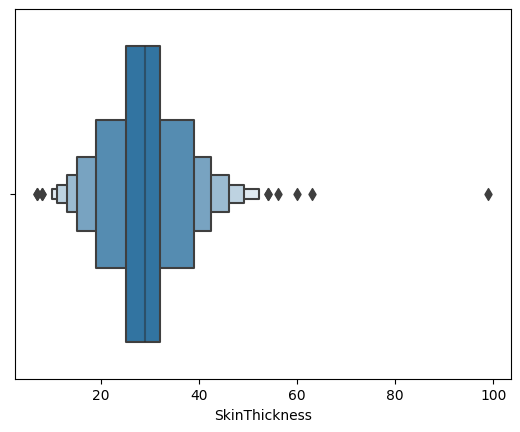

In [30]:
sns.boxenplot(information_diabetes, x='SkinThickness')

Задание 8.8

Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

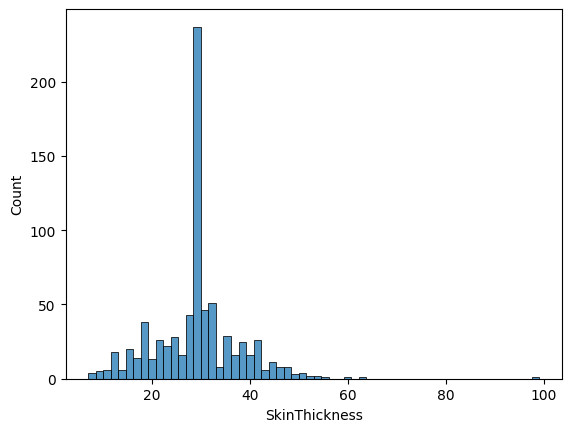

In [31]:
sns.histplot(information_diabetes, x='SkinThickness')

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

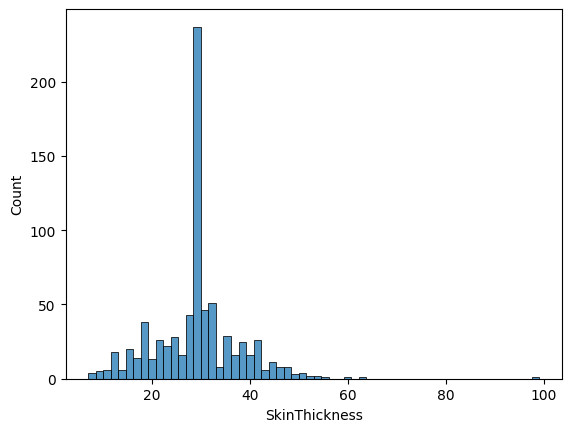

In [32]:
sns.histplot(information_diabetes['SkinThickness'])

In [33]:
skin = information_diabetes['SkinThickness']
mu = skin.mean()
sigma = skin.std()

left_bound = mu - 3*sigma
right_bound = mu + 3*sigma

mask = (information_diabetes['SkinThickness'] < left_bound) | (information_diabetes['SkinThickness'] > right_bound)
information_diabetes[mask].shape[0]


4

Задание 8.9

На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [34]:
information_diabetes['DiabetesPedigreeFunction'].min()

0.078

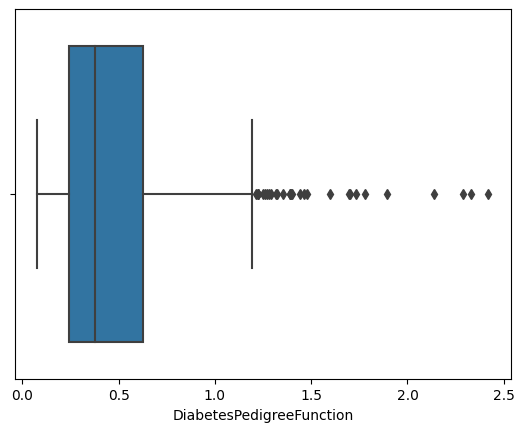

In [35]:
sns.boxplot(information_diabetes, x='DiabetesPedigreeFunction');
# information_diabetes['DiabetesPedigreeFunction']

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

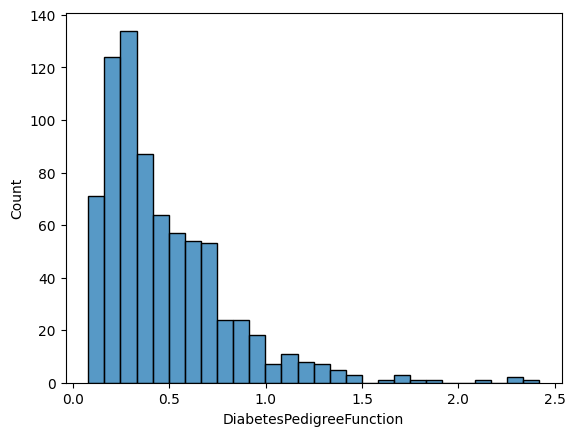

In [36]:
sns.histplot(information_diabetes, x='DiabetesPedigreeFunction')

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

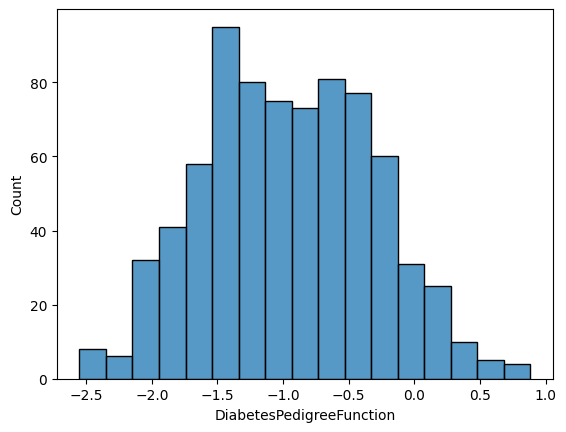

In [37]:
log_x = np.log(information_diabetes['DiabetesPedigreeFunction'])
sns.histplot(log_x)

In [38]:
log_x

0     -0.843970
1     -1.910543
2     -1.845160
3     -0.155485
4     -1.560648
         ...   
763   -0.889162
764   -1.575036
765    0.127513
766   -1.584745
767   -1.339411
Name: DiabetesPedigreeFunction, Length: 761, dtype: float64

In [39]:
mu = log_x.mean()
sigma = log_x.std()
left_bound = mu - 3*sigma
right_bound = mu + 3*sigma
outliers = information_diabetes[(log_x < left_bound) | (log_x > right_bound)]
display(mu)
display(sigma)
display(left_bound)
display(right_bound)
outliers

-0.9546025001815267

0.6439127618648492

-2.8863407857760746

0.977135785413021

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome


In [40]:
q25 = information_diabetes['DiabetesPedigreeFunction'].quantile(0.25)
q75 = information_diabetes['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q75 - q25
left_bound = q25 - 1.5*iqr
right_bound = q75 + 1.5*iqr
mask = information_diabetes[(information_diabetes['DiabetesPedigreeFunction'] < left_bound) | (information_diabetes['DiabetesPedigreeFunction'] > right_bound)]
mask.shape

(29, 8)